In [51]:
# 3.5 新闻分类：多分类问题
# 加载路透社数据集
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)



In [52]:
len(train_data)

8982

In [53]:
len(test_data)

2246

In [54]:
# 每个样本都是一个整数列表（表示单词索引）
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [55]:
# 将索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [56]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [57]:
train_labels[10]

3

In [58]:
# 将数据向量化
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# 数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [59]:
# 将训练标签向量化
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 训练标签向量化
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [60]:
# keras内置方法
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [61]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [62]:
# 编译模型
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy', # 分类交叉熵
    metrics=['accuracy']
)

In [63]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [64]:
# 训练模型
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 381us/step - loss: 2.5570 - accuracy: 0.5065 - val_loss: 1.7308 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.4033 - accuracy: 0.7095 - val_loss: 1.3004 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 2s 239us/step - loss: 1.0289 - accuracy: 0.7789 - val_loss: 1.1071 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 2s 262us/step - loss: 0.8022 - accuracy: 0.8275 - val_loss: 1.0241 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 2s 243us/step - loss: 0.6411 - accuracy: 0.8646 - val_loss: 0.9532 - val_accuracy: 0.8100
Epoch 6/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.5125 - accuracy: 0.8941 - val_loss: 0.9381 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 2s 244us/step - loss

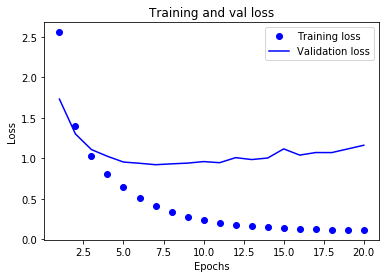

In [65]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

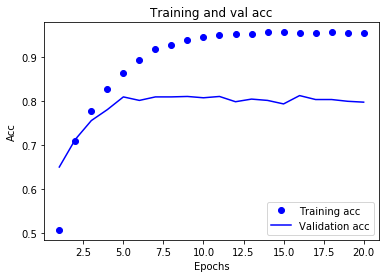

In [69]:
# 绘制训练精度和验证精度
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and val acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [82]:
# 从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 241us/step - loss: 2.5163 - accuracy: 0.5079 - val_loss: 1.6323 - val_accuracy: 0.6540
Epoch 2/9
7982/7982 [==============================] - 2s 204us/step - loss: 1.3522 - accuracy: 0.7136 - val_loss: 1.2551 - val_accuracy: 0.7260
Epoch 3/9
7982/7982 [==============================] - 2s 210us/step - loss: 1.0129 - accuracy: 0.7810 - val_loss: 1.0929 - val_accuracy: 0.7590
Epoch 4/9
7982/7982 [==============================] - 2s 211us/step - loss: 0.7978 - accuracy: 0.8284 - val_loss: 1.0018 - val_accuracy: 0.8020
Epoch 5/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.6377 - accuracy: 0.8637 - val_loss: 0.9480 - val_accuracy: 0.8020
Epoch 6/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.5067 - accuracy: 0.8936 - val_loss: 0.9054 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 2s 208us/step - loss: 0.415

In [83]:
results

[0.9882659532083323, 0.790739119052887]

In [72]:
# 在新数据上生成预测结果
predictions = model.predict(x_test)

In [74]:
# 每个元素都是长度为46的向量
predictions[0].shape

(46,)

In [76]:
# 向量所有元素总和为1
np.sum(predictions[0])

1.0

In [77]:
# 最大的元素就是预测类别，既概率最大的类别
np.argmax(predictions[0])

3

In [78]:
# 具有信息瓶颈的模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 中间层的维度远远小于64的时候，造成信息瓶颈
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 152us/step - loss: 3.0500 - accuracy: 0.3277 - val_loss: 2.4592 - val_accuracy: 0.3640
Epoch 2/20
7982/7982 [==============================] - 1s 105us/step - loss: 2.1962 - accuracy: 0.3760 - val_loss: 2.0419 - val_accuracy: 0.3840
Epoch 3/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.7806 - accuracy: 0.3926 - val_loss: 1.6927 - val_accuracy: 0.5310
Epoch 4/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.4495 - accuracy: 0.5980 - val_loss: 1.5181 - val_accuracy: 0.5950
Epoch 5/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.2661 - accuracy: 0.6377 - val_loss: 1.4575 - val_accuracy: 0.6100
Epoch 6/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.1506 - accuracy: 0.6760 - val_loss: 1.4312 - val_accuracy: 0.6510
Epoch 7/20
7982/7982 [==============================] - 1s 126us/step - loss:

In [80]:
results 

[2.1943082144933412, 0.6500445008277893]